# Game: Membuat Model Monetisasi

## Tugas:

Membentuk model monetisasi untuk aplikasi game dan memilih waktu yang optimal untuk menampilkan iklan. Melakukan analisis data penelitian, menguji hipotesis, dan menghitung metrik bisnis utama dari aplikasi tersebut.

## Deskripsi Dataset:

Dataset utama berisi data tentang peristiwa yang terjadi dalam permainan mobile "Space Brothers". Dalam permainan ini, pengguna membangun program luar angkasa mereka sendiri dan mencoba untuk berhasil dalam tugas sulit kolonisasi galaksi.

Monetisasi utama permainan - yang masih dalam tahap perencanaan. Namun, diperkirakan bahwa dalam aplikasi ini akan ada tampilan iklan pada layar saat pemain memilih jenis objek yang akan dibangun.

Dataset ini berisi data tentang permainan pengguna pada tingkat pertama. Menyelesaikan tingkat pertama memerlukan pemain untuk memenuhi salah satu dari dua kondisi berikut:

* Mengalahkan musuh pertama.
* Melaksanakan proyek - pengembangan perakitan satelit orbital.

Dataset ini berisi data tentang pengguna awal dari aplikasi - kohor pengguna yang mulai menggunakan aplikasi dalam rentang tanggal 4 hingga 10 Mei.

Selain dataset utama, ada dua dataset tambahan dengan informasi tentang aktivitas periklanan. Dataset ini juga akan membantu dalam penyelesaian tugas.

## Tabel

* 1. Pengenalan Data
* 2. Pra-pemrosesan Data
    * 2.1. Menangani data yang hilang.
    * 2.2. Mengubah jenis data yang diperlukan.
    * 2.3. Mencari duplikat dalam data.
* 3. Eksploratif Data Analisis (EDA)
    * 3.1. Analisis Pengguna:
        * 3.1.1. Membangun diagram jumlah objek yang dibangun.
        * 3.1.2. Membangun diagram jumlah peristiwa per hari.
        * 3.1.3. Membangun diagram jumlah bangunan yang dibangun per hari dengan pemisahan berdasarkan jenis bangunan.
    * 3.2. Analisis Aktivitas Periklanan:
        * 3.2.1. Membangun diagram jumlah sumber pengguna yang mengunduh aplikasi.
        * 3.2.2. Membangun diagram biaya berdasarkan sumber.
        * 3.2.3. Membangun diagram biaya per hari.
    * 3.3. Analisis Pengaruh Peristiwa Terhadap Pencapaian Tujuan:
        * 3.3.1. Membangun grafik ketergantungan antara jumlah bangunan dan penyelesaian level.
        * 3.3.2. Membangun grafik ketergantungan antara jumlah hari dalam permainan dan penyelesaian level.
        * 3.3.3. Membangun grafik ketergantungan antara sumber pengguna dan penyelesaian level.
* 4. Pengujian Hipotesis
    * 4.1. Hipotesis tentang perbedaan waktu penyelesaian level antara pengguna yang menyelesaikan level dengan proyek dan yang menyelesaikannya dengan mengalahkan pemain lain.
    * 4.2. Hipotesis tentang perbedaan rata-rata jumlah bangunan yang dibangun oleh pengguna yang menyelesaikan level melalui proyek dan dengan mengalahkan pemain lain.
* 5. Analisis Indikator Bisnis
    * 5.1. Analisis biaya akuisisi pelanggan (CAC).
    * 5.2. Analisis pendapatan dari iklan (LTV).
* 6. Kesimpulan Umum
    * 6.1. Temuan utama, momen menarik, dan kesimpulan dari proyek ini.

## 1. Pengenalan Data

In [1]:
# Mengimpor Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membaca data dari file CSV
try:
    cost = pd.read_csv('/datasets/ad_costs_us.csv')
    events = pd.read_csv('/datasets/events_us.csv')
    source = pd.read_csv('/datasets/user_source_us.csv')
except:
    print('Ada sesuatu yang tidak beres.')

In [3]:
# Mengatur tampilan untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Mengatur lebar kolom
pd.set_option("max_colwidth", 999)

# Mengabaikan peringatan yang muncul
import warnings
warnings.simplefilter('ignore')

In [4]:
cost.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [5]:
events.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [6]:
source.head()

,user_id,event_date,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,google_play_ads
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,youtube_channel_network
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05,facebook_ads


## 2. Pra-pemrosesan Data

### 2.1. Menangani data yang hilang.

In [7]:
# Melihat informasi umum tentang dataset "events"
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [8]:
# Koreksi kolom tanggal dalam dataset "events"
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   127957 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


In [9]:
events[events['event'] =='project']

,event_datetime,event,building_type,user_id,project_type
47121,2020-05-08 18:10:25,project,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly
57398,2020-05-09 13:49:11,project,NaN,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly
58797,2020-05-09 16:19:33,project,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly
61174,2020-05-09 20:29:01,project,NaN,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly
63770,2020-05-10 00:57:47,project,NaN,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly
...,...,...,...,...,...
135602,2020-06-02 03:04:42,project,NaN,9d98001c-7e14-40d7-896e-46b3047365fd,satellite_orbital_assembly
135603,2020-06-02 06:21:03,project,NaN,df4a1e13-eba9-4928-a7cf-ee303d6f80f9,satellite_orbital_assembly
135609,2020-06-02 17:17:28,project,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,satellite_orbital_assembly
135617,2020-06-03 09:46:04,project,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,satellite_orbital_assembly


In [10]:
events.duplicated().sum()

1

In [11]:
# Menghapus duplikat dalam dataset "events" dan mereset indeks
events = events.drop_duplicates().reset_index(drop=True)

In [12]:
events.duplicated().sum()

0

Secara keseluruhan, data dalam dataset utama sudah bersih. Jenis data dalam kolom tanggal kejadian telah diperbarui, dan duplikat telah dihapus. Kehadiran nilai yang hilang dalam kolom pemilihan jenis bangunan sepenuhnya dapat dimengerti, karena jika pengguna melakukan suatu kejadian yang tidak terkait dengan pembangunan bangunan (misalnya menyelesaikan proyek), maka akan ada nilai yang hilang dalam baris tersebut. Hal yang sama berlaku untuk jenis proyek yang sudah direalisasikan; jika pengguna tidak menyelesaikan proyek, maka akan ada nilai yang hilang dalam kolom tersebut.

### 2.2. Mengubah jenis data yang diperlukan.

In [13]:
# Mengganti format numerik menjadi format tanggal (hari)
events['event_datetime'] = events['event_datetime'].dt.date

In [14]:
# Melihat informasi umum tentang dataset "cost"
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [15]:
# Koreksi kolom tanggal dalam dataset "cost"
cost['day'] = pd.to_datetime(cost['day'])
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


### 2.3. Mencari duplikat dalam data.

In [16]:
cost.duplicated().sum()

0

Semuanya dalam keadaan baik. Hanya mengubah jenis data pada kolom tanggal.

In [17]:
# Melihat informasi umum tentang dataset "source"
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     13576 non-null  object
 1   event_date  13576 non-null  object
 2   source      13576 non-null  object
dtypes: object(3)
memory usage: 318.3+ KB


In [18]:
source.duplicated().sum()

0

Semuanya baik-baik saja di sini.

## 3. Eksploratif Data Analisis

### 3.1. Analisis Pengguna

In [19]:
# Menghitung jumlah pengguna unik
print(len(events['user_id'].unique()))

13576


In [20]:
# Menghitung berapa banyak pengguna yang menyelesaikan tahap pertama
events[events['event'] == 'finished_stage_1'].count()[0]

5817

In [21]:
# Menghitung persentase pengguna yang menyelesaikan tahap pertama
percentage = (events[events['event']=='finished_stage_1'].count()[0]/len(events['user_id'].unique())) * 100
percentage

42.847672362993514

Dari total 13.576 pengguna unik selama periode ini, sebanyak 5.817 pengguna telah menyelesaikan tahap pertama. Dengan demikian, sekitar 42% dari pengguna telah berhasil menyelesaikan tahap pertama permainan.

#### 3.1.1. Membangun diagram jumlah objek yang dibangun.

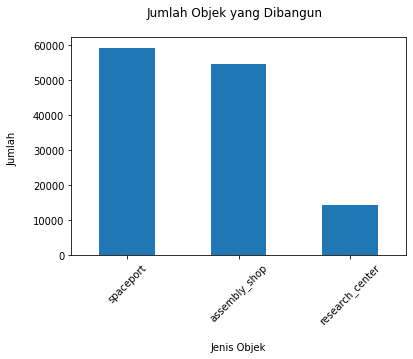

In [22]:
# Menghitung jumlah objek yang dibangun berdasarkan jenisnya
count_obj = events.groupby('building_type')['building_type'].count().sort_values(ascending=False)

# Membuat diagram batang
count_obj.plot(kind='bar')
plt.title('Jumlah Objek yang Dibangun  \n ')
plt.ylabel("Jumlah \n")
plt.xlabel(" \nJenis Objek")
plt.xticks(rotation=45)
plt.show()

Pusat penelitian dibangun jauh lebih jarang daripada pelabuhan luar angkasa dan pabrik perakitan. Kemungkinan besar, untuk membangunnya, Anda perlu menghabiskan lebih banyak sumber daya.

#### 3.1.2. Membangun diagram jumlah peristiwa per hari.

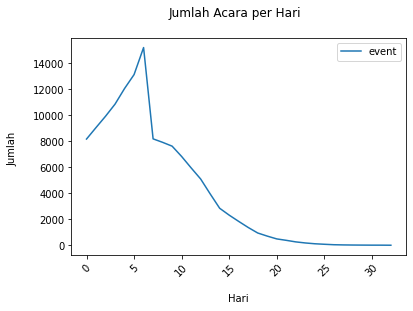

In [23]:
# Menghitung jumlah acara berdasarkan tanggal
day_events = events.groupby('event_datetime')['event'].count().to_frame().reset_index()

# Membuat diagram
day_events.plot()
plt.title('Jumlah Acara per Hari  \n ')
plt.ylabel("Jumlah \n")
plt.xlabel(" \nHari")
plt.xticks(rotation=45)
plt.show()

Dalam lima hari pertama, pengguna aktif membangun bangunan dengan intensitas tinggi. Kemungkinan setelah itu, pembangunan membutuhkan lebih banyak sumber daya, dan membangun bangunan dengan cepat tidak lagi memungkinkan.

#### 3.1.3. Membangun diagram jumlah bangunan yang dibangun per hari dengan pemisahan berdasarkan jenis bangunan.

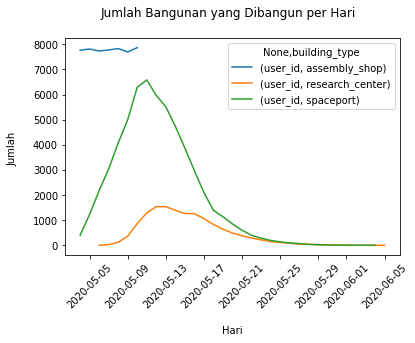

In [24]:
# Membangun tabel pivot untuk menghitung jumlah bangunan yang dibangun setiap hari berdasarkan jenisnya
p = events[['event_datetime', 'building_type', 'user_id']].pivot_table(
    index='event_datetime', columns='building_type', aggfunc='count').plot()

plt.title('Jumlah Bangunan yang Dibangun per Hari  \n ')
plt.ylabel("Jumlah \n")
plt.xlabel(" \nHari")
plt.xticks(rotation=45)
plt.show()

Dalam tujuh hari pertama, pemain sangat aktif membangun pabrik perakitan, kemudian pelabuhan luar angkasa dan pusat penelitian mulai digunakan. Hal yang menarik, semua pengguna berhenti membangun pabrik perakitan setelah seminggu.

In [25]:
# Menghasilkan dataset yang berisi pengguna yang menyelesaikan tingkat melalui cara selain membangun
finished_level = events[events['event']!='building']

In [26]:
# Menghitung berapa banyak pengguna yang menyelesaikan tingkat melalui proyek
finished_level[finished_level['event']=='project'].count()[0]

1866

In [27]:
# Menghitung jumlah pengguna yang menyelesaikan tingkat melalui cara selain membangun
len(finished_level['user_id'].unique())

5817

Sebanyak 1.866 pemain menyelesaikan tingkat dengan menyelesaikan proyek, sementara 3.951 pemain menyelesaikannya dengan mengalahkan musuh. Ini mungkin mengindikasikan bahwa metode kedua lebih mudah. Mungkin pengguna secara tidak sengaja bertemu dengan pemain lain dan terpaksa harus bertarung, atau membangun proyek mungkin lebih memakan waktu dan memerlukan lebih banyak sumber daya.

### 3.2. Analisis Aktivitas Periklanan

#### 3.2.1. Membangun diagram jumlah sumber pengguna yang mengunduh aplikasi.

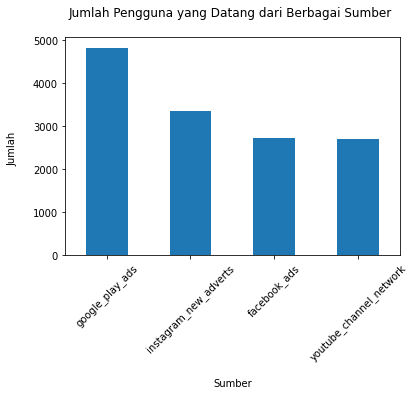

In [28]:
# Membangun diagram batang yang menampilkan jumlah pengguna yang datang dari berbagai sumber
s = source.groupby('source')['user_id'].count().sort_values(ascending=False)
s.plot(kind='bar')
plt.title('Jumlah Pengguna yang Datang dari Berbagai Sumber \n ')
plt.ylabel("Jumlah \n")
plt.xlabel(" \nSumber")
plt.xticks(rotation=45)
plt.show()

Sebagian besar pengguna datang dari google_play_ads.

#### 3.2.2. Membangun diagram biaya berdasarkan sumber.

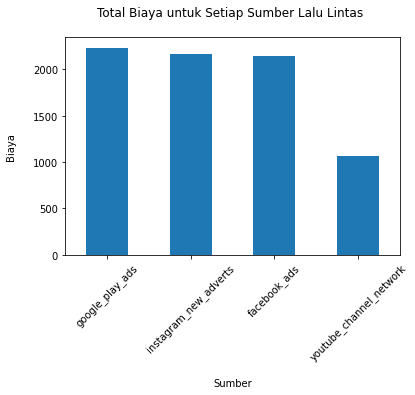

In [29]:
# Membangun diagram batang yang menampilkan total biaya untuk setiap sumber lalu lintas
cbs = cost.groupby('source')['cost'].sum().sort_values(ascending=False)
cbs.plot(kind='bar')
plt.title('Total Biaya untuk Setiap Sumber Lalu Lintas \n ')
plt.ylabel("Biaya \n")
plt.xlabel(" \nSumber")
plt.xticks(rotation=45)
plt.show()

In [30]:
s = s.to_frame().reset_index()
cbs = cbs.to_frame().reset_index()

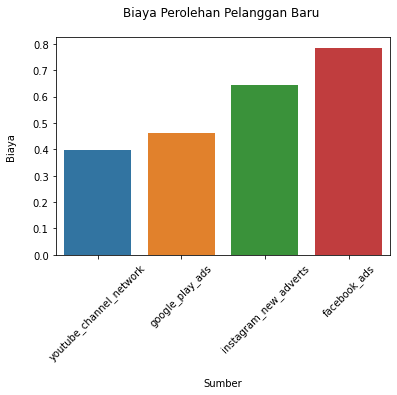

In [31]:
# Menghitung biaya per pelanggan baru untuk setiap sumber lalu lintas
cpu = s.merge(cbs, on='source')
cpu['cost_per_user'] = cpu['cost'] / cpu['user_id']
cpu = cpu.sort_values(by='cost_per_user')

sns.barplot(x='source', y='cost_per_user', data=cpu)
plt.title('Biaya Perolehan Pelanggan Baru \n ')
plt.ylabel("Biaya \n")
plt.xlabel(" \nSumber")
plt.xticks(rotation=45)
plt.show()

Meskipun jumlah pelanggan yang datang dari YouTube lebih sedikit, biaya perolehan pelanggan baru melalui sumber ini sangat rendah karena iklannya murah. Dengan kata lain, satu tayangan iklan (dari mana kita mendapatkan $0,07) sepenuhnya mencukupi untuk menutup biaya perolehan pelanggan baru (kecuali Facebook).

#### 3.2.3. Membangun diagram biaya per hari.

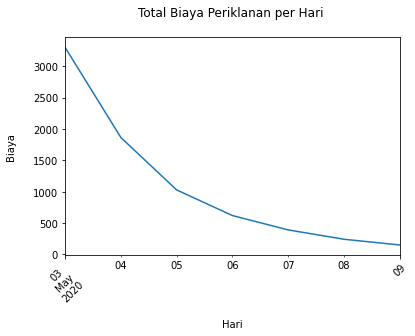

In [32]:
# Membangun grafik yang menampilkan total biaya periklanan setiap hari
cpd = cost.groupby('day')['cost'].sum()
cpd.plot()
plt.title('Total Biaya Periklanan per Hari \n ')
plt.ylabel("Biaya \n")
plt.xlabel(" \nHari")
plt.xticks(rotation=45)
plt.show()

Biaya per klik secara monoton menurun. Dengan kata lain, setiap hari semakin sedikit pengguna yang mengklik iklan, meskipun harga per klik tetap konstan.

### 3.3. Analisis Pengaruh Peristiwa Terhadap Pencapaian Tujuan

In [33]:
# Membagi kolom 'event' menjadi kolom-kolom terpisah dalam DataFrame
def process_column(s):
    splits = s.split(' ')
    d = {}
    for key, *rest in [splits[i:i + 3] for i in range(0, len(splits), 3)]:
        d.setdefault(key, []).append(' '.join(rest))

    d2 = {}
    for key, values in d.items():
        if len(values) > 1:
            for i, value in enumerate(values):
                d2[f'{key}{i + 1}'] = value
        else:
            d2[key] = values[0]
    return pd.Series(d2)

# Menggunakan fungsi di atas untuk memproses kolom 'event' dalam DataFrame 'events'
events = pd.merge(events, events.event.apply(process_column), left_index=True, right_index=True)

In [34]:
events

,event_datetime,event,building_type,user_id,project_type,building,finished_stage_1,project
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN
1,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN
2,2020-05-04,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,,NaN,NaN
3,2020-05-04,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,,NaN,NaN
4,2020-05-04,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,,NaN,NaN
...,...,...,...,...,...,...,...,...
135634,2020-06-05,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,,NaN,NaN
135635,2020-06-05,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,NaN,,NaN
135636,2020-06-05,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN,,NaN,NaN
135637,2020-06-05,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,NaN,,NaN


In [35]:
# Menghitung jumlah bangunan yang dibangun oleh setiap pengguna dan apakah mereka menyelesaikan level 1 atau tidak
build_fin = events.groupby('user_id')[['building_type', 'finished_stage_1']].count().reset_index()
build_fin

,user_id,building_type,finished_stage_1
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,0
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9,0
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,0
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8,1
4,002f508f-67b6-479f-814b-b05f00d4e995,12,0
...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,9,1
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,16,0
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,9,1
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,7,0


#### 3.3.1. Membangun grafik ketergantungan antara jumlah bangunan dan penyelesaian level.

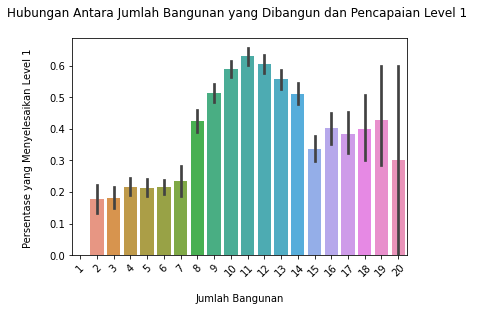

In [36]:
# Membangun diagram batang yang menunjukkan hubungan antara jumlah bangunan yang dibangun dan jumlah pengguna yang menyelesaikan level 1
sns.barplot(x='building_type', y='finished_stage_1', data=build_fin)
plt.title('Hubungan Antara Jumlah Bangunan yang Dibangun dan Pencapaian Level 1 \n ')
plt.ylabel("Persentase yang Menyelesaikan Level 1 \n")
plt.xlabel(" \nJumlah Bangunan")
plt.xticks(rotation=45)
plt.show()

Seperti yang terlihat, sangat sedikit orang yang menyelesaikan level dengan jumlah bangunan yang sedikit (kurang dari 7). Setelahnya, persentase menyelesaikan level tumbuh pesat, namun kemudian kembali menurun. Banyak orang memiliki lebih dari 15 bangunan dan masih belum menyelesaikan level. Kemungkinan mereka tidak mengklik tombol menyelesaikan level atau membangun banyak bangunan dengan biaya rendah.

#### 3.3.2. Membangun grafik ketergantungan antara jumlah hari dalam permainan dan penyelesaian level.

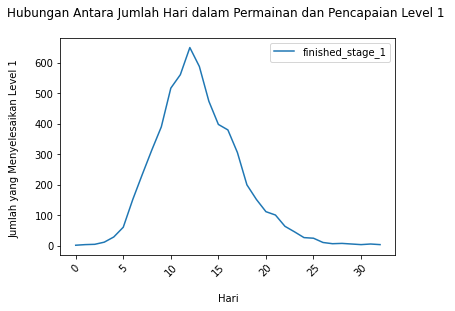

In [37]:
# Membangun grafik yang menunjukkan hubungan antara jumlah hari dalam permainan dan jumlah pengguna yang menyelesaikan level 1
day_fin = events.groupby('event_datetime')['finished_stage_1'].count().reset_index()

day_fin.plot()
plt.title('Hubungan Antara Jumlah Hari dalam Permainan dan Pencapaian Level 1 \n ')
plt.ylabel("Jumlah yang Menyelesaikan Level 1 \n")
plt.xlabel(" \nHari")
plt.xticks(rotation=45)
plt.show()

Pada awalnya, jumlah orang yang menyelesaikan level meningkat dengan cepat hingga mencapai titik tertentu, dan kemudian menurun tajam. Sebagian besar pengguna menyelesaikan level dalam waktu 13 hari, atau mereka mungkin berhenti bermain dan keluar dari permainan.

#### 3.3.3. Membangun grafik ketergantungan antara sumber pengguna dan penyelesaian level.

In [38]:
# Menggabungkan DataFrame 'actions' dengan DataFrame 'source' berdasarkan kolom 'user_id'
events = events.merge(source, on='user_id')

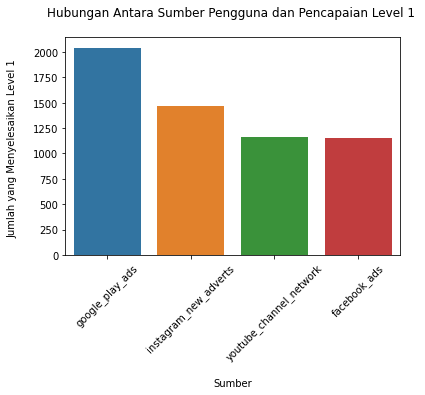

In [39]:
# Menghitung jumlah pengguna yang menyelesaikan level 1 berdasarkan sumber pengguna (kolom 'source')
l = (events.groupby('source')['finished_stage_1'].count().to_frame()
             .reset_index().sort_values(by='finished_stage_1', ascending=False))

# Membangun diagram batang yang menunjukkan hubungan antara sumber pengguna dan jumlah yang menyelesaikan level 1
sns.barplot(x='source', y='finished_stage_1', data=l)
plt.title('Hubungan Antara Sumber Pengguna dan Pencapaian Level 1 \n ')
plt.ylabel("Jumlah yang Menyelesaikan Level 1 \n")
plt.xlabel(" \nSumber")
plt.xticks(rotation=45)
plt.show()

Pengguna yang datang dari google_play_ads lebih sering menyelesaikan level dibandingkan dengan pengguna yang datang dari Facebook. Kemungkinan besar, komunitas yang datang dari google_play_ads memiliki tingkat keterlibatan yang lebih tinggi daripada yang datang dari Facebook.

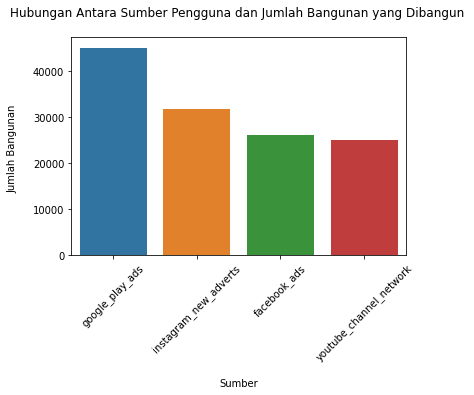

In [40]:
# Menghitung jumlah bangunan yang dibangun oleh pengguna berdasarkan sumber pengguna (kolom 'source')
d = (events.groupby('source')['building_type'].count().to_frame()
             .reset_index().sort_values(by='building_type', ascending=False))

# Membangun diagram batang yang menunjukkan hubungan antara sumber pengguna dan jumlah bangunan yang dibangun
sns.barplot(x='source', y='building_type', data=d)
plt.title('Hubungan Antara Sumber Pengguna dan Jumlah Bangunan yang Dibangun \n ')
plt.ylabel("Jumlah Bangunan \n")
plt.xlabel(" \nSumber")
plt.xticks(rotation=45)
plt.show()

Pengguna dari google_play_ads lebih sering menyelesaikan level dan, sebagai akibatnya, membangun lebih banyak bangunan. Hal ini perlu diperhatikan karena setiap kali pengguna membangun sebuah bangunan, mereka mungkin akan melihat iklan.

In [41]:
# Mengidentifikasi pengguna yang menyelesaikan level melalui proyek
p = events[events['event'] == 'project']

# Mencari pengguna-pengguna tersebut dalam DataFrame 'events'
pr = events['user_id'].isin(p['user_id'])
projects = events[pr]
projects

,event_datetime,event,building_type,user_id,project_type,building,finished_stage_1,project,event_date,source
7,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN,2020-05-04,facebook_ads
8,2020-05-06,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN,2020-05-04,facebook_ads
9,2020-05-07,building,spaceport,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN,2020-05-04,facebook_ads
10,2020-05-07,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN,2020-05-04,facebook_ads
11,2020-05-07,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN,2020-05-04,facebook_ads
...,...,...,...,...,...,...,...,...,...,...
135583,2020-05-28,building,spaceport,637a8d39-3872-4549-80cc-bebee6c88056,NaN,,NaN,NaN,2020-05-10,google_play_ads
135584,2020-05-28,building,research_center,637a8d39-3872-4549-80cc-bebee6c88056,NaN,,NaN,NaN,2020-05-10,google_play_ads
135585,2020-05-30,building,research_center,637a8d39-3872-4549-80cc-bebee6c88056,NaN,,NaN,NaN,2020-05-10,google_play_ads
135586,2020-06-01,project,NaN,637a8d39-3872-4549-80cc-bebee6c88056,satellite_orbital_assembly,NaN,NaN,,2020-05-10,google_play_ads


In [42]:
print('Rata-rata jumlah bangunan oleh pengguna yang menyelesaikan level melalui proyek:', projects['building_type'].count() / len(projects['user_id'].unique()))

Rata-rata jumlah bangunan oleh pengguna yang menyelesaikan level melalui proyek: 12.64790996784566


In [43]:
# Mengidentifikasi pengguna yang menyelesaikan level dengan mengalahkan musuh (event = 'finished_stage_1')
enemy = events[events['event'] == 'finished_stage_1']

# Mencari pengguna-pengguna tersebut dalam DataFrame 'actions'
enemy_users = events['user_id'].isin(enemy['user_id'])
enemy = events[enemy_users]
enemy

,event_datetime,event,building_type,user_id,project_type,building,finished_stage_1,project,event_date,source
7,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN,2020-05-04,facebook_ads
8,2020-05-06,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN,2020-05-04,facebook_ads
9,2020-05-07,building,spaceport,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN,2020-05-04,facebook_ads
10,2020-05-07,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN,2020-05-04,facebook_ads
11,2020-05-07,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,,NaN,NaN,2020-05-04,facebook_ads
...,...,...,...,...,...,...,...,...,...,...
135616,2020-05-17,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,,NaN,NaN,2020-05-10,youtube_channel_network
135617,2020-05-23,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,,NaN,NaN,2020-05-10,youtube_channel_network
135618,2020-05-26,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,,NaN,NaN,2020-05-10,youtube_channel_network
135619,2020-05-30,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,,NaN,NaN,2020-05-10,youtube_channel_network


In [44]:
print('Rata-rata jumlah bangunan oleh pengguna yang menyelesaikan level dengan mengalahkan musuh:', enemy['building_type'].count() / len(enemy['user_id'].unique()))

Rata-rata jumlah bangunan oleh pengguna yang menyelesaikan level dengan mengalahkan musuh: 10.449716348633316


Pengguna yang menyelesaikan level melalui proyek rata-rata membangun lebih banyak bangunan daripada pengguna yang menyelesaikan level dengan mengalahkan musuh. Ini akan memerlukan konfirmasi melalui analisis statistik, tetapi jika ditemukan bahwa perbedaan tersebut signifikan, maka mungkin bukan ide terbaik untuk menampilkan iklan pada layar pemilihan tipe bangunan, karena penghasilan yang dihasilkan dapat berbeda tergantung pada strategi pengguna. Selain itu, sebagian besar pengguna menyelesaikan level dengan cara mengalahkan musuh.

## 4. Pengujian Hipotesis

### 4.1. Hipotesis tentang perbedaan waktu penyelesaian level antara pengguna yang menyelesaikan level dengan proyek dan yang menyelesaikannya dengan mengalahkan pemain lain.

    H0 (Hipotesis Nol): Rata-rata waktu menyelesaikan level melalui proyek sama dengan rata-rata waktu menyelesaikan level melalui mengalahkan musuh.
    H1 (Hipotesis Alternatif): Rata-rata waktu menyelesaikan level melalui proyek tidak sama dengan rata-rata waktu menyelesaikan level melalui mengalahkan musuh.

In [45]:
# Mengidentifikasi waktu pertama dan terakhir pengguna menyelesaikan level melalui proyek
mean_time_projects = projects.groupby('user_id')['event_datetime'].agg(['first', 'last']).reset_index()
mean_time_projects

,user_id,first,last
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-04,2020-05-16
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-08,2020-05-24
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-07,2020-05-27
3,00de2809-403e-4476-a2f7-ca1b11700190,2020-05-04,2020-05-18
4,00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-05,2020-05-20
...,...,...,...
1861,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,2020-05-04,2020-05-23
1862,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,2020-05-05,2020-05-13
1863,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,2020-05-04,2020-05-18
1864,ff841992-d93b-462e-bc6e-18c24a514f36,2020-05-05,2020-05-16


In [46]:
# Menghitung perbedaan waktu antara waktu pertama dan terakhir pengguna menyelesaikan level melalui proyek
mean_time_projects['diffr'] = mean_time_projects['last'] - mean_time_projects['first']
mean_time_projects

,user_id,first,last,diffr
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-04,2020-05-16,12 days
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-08,2020-05-24,16 days
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-07,2020-05-27,20 days
3,00de2809-403e-4476-a2f7-ca1b11700190,2020-05-04,2020-05-18,14 days
4,00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-05,2020-05-20,15 days
...,...,...,...,...
1861,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,2020-05-04,2020-05-23,19 days
1862,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,2020-05-05,2020-05-13,8 days
1863,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,2020-05-04,2020-05-18,14 days
1864,ff841992-d93b-462e-bc6e-18c24a514f36,2020-05-05,2020-05-16,11 days


In [47]:
mean_time_projects['diffr'].mean()

Timedelta('13 days 09:31:03.665594855')

In [48]:
mean_time_enemy = enemy.groupby('user_id')['event_datetime'].agg(['first', 'last']).reset_index()
mean_time_enemy['diffr'] = mean_time_enemy['last'] - mean_time_enemy['first']
mean_time_enemy['diffr'].mean()

Timedelta('11 days 19:24:13.739040742')

In [49]:
mean_time_projects['total_days_td'] = mean_time_projects['diffr'] / pd.to_timedelta(1, unit='D')
mean_time_enemy['total_days_td'] = mean_time_enemy['diffr'] / pd.to_timedelta(1, unit='D')

In [50]:
mean_time_projects

,user_id,first,last,diffr,total_days_td
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-04,2020-05-16,12 days,12.0
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-08,2020-05-24,16 days,16.0
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-07,2020-05-27,20 days,20.0
3,00de2809-403e-4476-a2f7-ca1b11700190,2020-05-04,2020-05-18,14 days,14.0
4,00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-05,2020-05-20,15 days,15.0
...,...,...,...,...,...
1861,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,2020-05-04,2020-05-23,19 days,19.0
1862,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,2020-05-05,2020-05-13,8 days,8.0
1863,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,2020-05-04,2020-05-18,14 days,14.0
1864,ff841992-d93b-462e-bc6e-18c24a514f36,2020-05-05,2020-05-16,11 days,11.0


    H0 (Hipotesis Nol): Rata-rata waktu menyelesaikan level melalui proyek sama dengan rata-rata waktu menyelesaikan level melalui mengalahkan musuh.
    H1 (Hipotesis Alternatif): Rata-rata waktu menyelesaikan level melalui proyek tidak sama dengan rata-rata waktu menyelesaikan level melalui mengalahkan musuh.

In [51]:
# Uji Hipotesis Kita
from scipy import stats as st
project_hyp = mean_time_projects['total_days_td']
enemy_hyp = mean_time_enemy['total_days_td']

print('Rata-rata waktu penyelesaian tingkat melalui proyek: ', pd.Series(project_hyp).mean())
print('Rata-rata waktu penyelesaian tingkat melalui membunuh musuh: ', pd.Series(enemy_hyp).mean())

alpha = 0.05 # Ambil tingkat signifikansi statistik 5%

results = st.ttest_ind(
    project_hyp, 
    enemy_hyp)
print('Nilai p:', results.pvalue)

if results.pvalue < alpha:
    print("Perbedaan Statistik Signifikan!")
else:
    print("TIDAK ADA PERBEDAAN statistik dalam waktu penyelesaian!")

Rata-rata waktu penyelesaian tingkat melalui proyek:  13.396570203644158
Rata-rata waktu penyelesaian tingkat melalui membunuh musuh:  11.808492350008596
Nilai p: 6.795995547277736e-51
Perbedaan Statistik Signifikan!


### 4.2. Hipotesis tentang perbedaan rata-rata jumlah bangunan yang dibangun oleh pengguna yang menyelesaikan level melalui proyek dan dengan mengalahkan pemain lain.

Dengan nilai p-value yang sangat rendah, kita dapat dengan keyakinan mengatakan bahwa ada perbedaan yang signifikan dalam waktu yang dibutuhkan untuk menyelesaikan level antara pengguna yang memilih strategi proyek dan mereka yang memilih strategi mengalahkan musuh.

    H0: Rata-rata jumlah bangunan yang dibangun oleh pengguna melalui proyek sama dengan rata-rata jumlah bangunan yang dibangun oleh pengguna melalui pembunuhan musuh.
    H1: Rata-rata jumlah bangunan yang dibangun oleh pengguna melalui proyek tidak sama dengan rata-rata jumlah bangunan yang dibangun oleh pengguna melalui pembunuhan musuh.

In [52]:
mean_build_projects = projects.groupby('user_id')['building_type'].count().reset_index()
mean_build_projects

,user_id,building_type
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,11
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,12
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,11
3,00de2809-403e-4476-a2f7-ca1b11700190,13
4,00e83261-5fd4-4939-9616-802b5a0202c6,13
...,...,...
1861,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,18
1862,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,11
1863,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,13
1864,ff841992-d93b-462e-bc6e-18c24a514f36,20


In [53]:
mean_build_enemy = enemy.groupby('user_id')['building_type'].count().reset_index()
mean_build_enemy

,user_id,building_type
0,001d39dc-366c-4021-9604-6a3b9ff01e25,8
1,003ee7e8-6356-4286-a715-62f22a18d2a1,8
2,004074f8-251a-4776-922c-8348dca1a2f6,12
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,8
4,0056c007-c082-43cc-bdef-afc49bca4cb9,3
...,...,...
5812,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,7
5813,ffe810f4-1a1f-464b-924d-6f120b0cb8df,16
5814,ffef4fed-164c-40e1-bde1-3980f76d0fb5,9
5815,fffb626c-5ab6-47c9-8113-2062a2f18494,9


    H0: Rata-rata jumlah bangunan yang dibangun oleh pengguna melalui proyek sama dengan rata-rata jumlah bangunan yang dibangun oleh pengguna melalui pembunuhan musuh.
    H1: Rata-rata jumlah bangunan yang dibangun oleh pengguna melalui proyek tidak sama dengan rata-rata jumlah bangunan yang dibangun oleh pengguna melalui pembunuhan musuh.

In [54]:
project_hyp_2 = mean_build_projects['building_type']
enemy_hyp_2 = mean_build_enemy['building_type']

# Menghitung rata-rata jumlah bangunan yang dibangun oleh pengguna melalui proyek
mean_buildings_project = pd.Series(project_hyp_2).mean()

# Menghitung rata-rata jumlah bangunan yang dibangun oleh pengguna melalui mengalahkan musuh
mean_buildings_enemy = pd.Series(enemy_hyp_2).mean()

print('Rata-rata jumlah bangunan yang dibangun oleh pengguna melalui proyek:', mean_buildings_project)
print('Rata-rata jumlah bangunan yang dibangun oleh pengguna melalui mengalahkan musuh:', mean_buildings_enemy)

alpha = 0.05  # Mengambil tingkat signifikansi kritis 5%

# Melakukan uji t independen untuk membandingkan kedua kelompok
results = st.ttest_ind(project_hyp_2, enemy_hyp_2)
print('p-nilai:', results.pvalue)

if results.pvalue < alpha:
    print("Perbedaan Statistik Signifikan!")
else:
    print("TIDAK ADA PERBEDAAN signifikan antara jumlah bangunan yang dibangun oleh pengguna melalui proyek dan melalui mengalahkan musuh!")

Rata-rata jumlah bangunan yang dibangun oleh pengguna melalui proyek: 12.64790996784566
Rata-rata jumlah bangunan yang dibangun oleh pengguna melalui mengalahkan musuh: 10.449716348633316
p-nilai: 1.6750102222325502e-162
Perbedaan Statistik Signifikan!


Hipothesis ini telah terkonfirmasi. Memang benar, tergantung pada pilihan strategi pengguna, pemain membangun rata-rata jumlah bangunan yang berbeda. Ini berarti menampilkan iklan saat pengguna memilih jenis bangunan untuk dibangun bukanlah ide yang baik.

1. Bisa menampilkan iklan selama jeda permainan.
2. Juga bisa menampilkan iklan dalam bentuk banner - iklan berbentuk persegi panjang yang muncul di bagian atas atau bawah layar. Mereka ditampilkan langsung saat bermain game tanpa mengganggu permainan.
3. Selain itu, bisa mempertimbangkan iklan dengan imbalan - iklan yang pengguna interaksikan untuk mendapatkan bonus dalam aplikasi, yang biasanya hanya dapat diperoleh dengan membayar. Iklan dengan imbalan bisa berupa video atau permainan interaktif.

## 5. Analisis Indikator Bisnis

### 5.1. Analisis biaya akuisisi pelanggan (CAC).

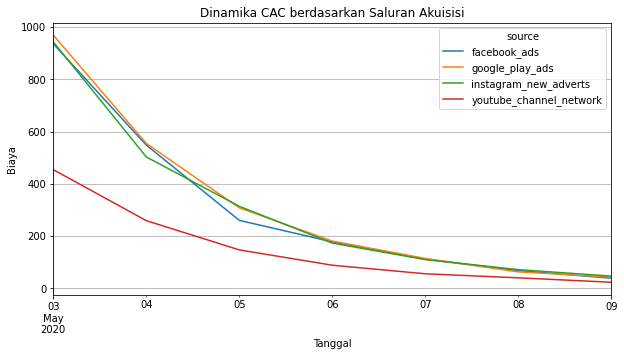

In [55]:
cost.pivot_table(
    index='day', columns='source', values='cost', aggfunc='sum'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Biaya')
plt.xlabel('Tanggal')
plt.title('Dinamika CAC berdasarkan Saluran Akuisisi')
plt.show()

Di seluruh saluran, biaya mengalami penurunan setiap harinya. Karena biaya ini merupakan biaya per klik, ini mengindikasikan bahwa setiap harinya ada jumlah pengguna yang mengklik iklan yang semakin sedikit, asalkan harga per klik tidak mengalami perubahan.

In [56]:
buildings = events.query('event !="finished_stage_1" and event !="project"')
buildings.head()

,event_datetime,event,building_type,user_id,project_type,building,finished_stage_1,project,event_date,source
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,2020-05-04,youtube_channel_network
1,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,2020-05-04,youtube_channel_network
2,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,2020-05-04,youtube_channel_network
3,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,2020-05-04,youtube_channel_network
4,2020-05-06,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,2020-05-04,youtube_channel_network


In [57]:
finish = events.query('event !="building"')
finish.head()

,event_datetime,event,building_type,user_id,project_type,building,finished_stage_1,project,event_date,source
17,2020-05-13,project,NaN,c07b1c10-f477-44dc-81dc-ec82254b1347,satellite_orbital_assembly,NaN,NaN,,2020-05-04,facebook_ads
19,2020-05-15,finished_stage_1,NaN,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,NaN,,NaN,2020-05-04,facebook_ads
32,2020-05-16,finished_stage_1,NaN,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,NaN,,NaN,2020-05-04,instagram_new_adverts
49,2020-05-11,finished_stage_1,NaN,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,NaN,,NaN,2020-05-04,google_play_ads
73,2020-05-16,finished_stage_1,NaN,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN,NaN,,NaN,2020-05-04,facebook_ads


In [58]:
buildings['revenue'] = 0.07

In [59]:
buildings

,event_datetime,event,building_type,user_id,project_type,building,finished_stage_1,project,event_date,source,revenue
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,2020-05-04,youtube_channel_network,0.07
1,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,2020-05-04,youtube_channel_network,0.07
2,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,2020-05-04,youtube_channel_network,0.07
3,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,2020-05-04,youtube_channel_network,0.07
4,2020-05-06,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,2020-05-04,youtube_channel_network,0.07
...,...,...,...,...,...,...,...,...,...,...,...
135634,2020-05-13,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,,NaN,NaN,2020-05-10,facebook_ads,0.07
135635,2020-05-18,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,,NaN,NaN,2020-05-10,facebook_ads,0.07
135636,2020-05-10,building,assembly_shop,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,,NaN,NaN,2020-05-10,youtube_channel_network,0.07
135637,2020-05-13,building,spaceport,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,,NaN,NaN,2020-05-10,youtube_channel_network,0.07


In [60]:
rev = pd.concat([buildings, finish])
rev

,event_datetime,event,building_type,user_id,project_type,building,finished_stage_1,project,event_date,source,revenue
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,2020-05-04,youtube_channel_network,0.07
1,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,2020-05-04,youtube_channel_network,0.07
2,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,2020-05-04,youtube_channel_network,0.07
3,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,2020-05-04,youtube_channel_network,0.07
4,2020-05-06,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,,NaN,NaN,2020-05-04,youtube_channel_network,0.07
...,...,...,...,...,...,...,...,...,...,...,...
135534,2020-05-27,finished_stage_1,NaN,825e727b-7847-4c5f-a26c-3ee0f18d8177,NaN,NaN,,NaN,2020-05-10,youtube_channel_network,NaN
135586,2020-06-01,project,NaN,637a8d39-3872-4549-80cc-bebee6c88056,satellite_orbital_assembly,NaN,NaN,,2020-05-10,google_play_ads,NaN
135587,2020-06-02,finished_stage_1,NaN,637a8d39-3872-4549-80cc-bebee6c88056,NaN,NaN,,NaN,2020-05-10,google_play_ads,NaN
135609,2020-05-26,finished_stage_1,NaN,0d37a895-ee0f-4e36-aadb-880cef670f0b,NaN,NaN,,NaN,2020-05-10,google_play_ads,NaN


### 5.2. Analisis pendapatan dari iklan (LTV).

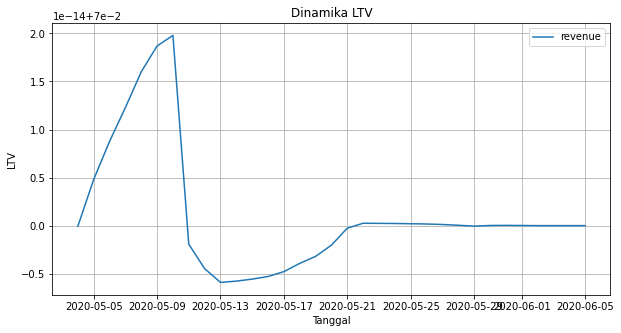

In [61]:
rev.pivot_table(
    index='event_datetime', values='revenue', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('LTV')
plt.xlabel('Tanggal')
plt.title('Dinamika LTV')
plt.show()

Dalam 4 hari pertama, terjadi lonjakan pendapatan yang sangat besar, dan kemudian terjadi penurunan tajam. Seperti yang saya duga sebelumnya, pengguna mungkin membangun lebih sedikit bangunan dari waktu ke waktu karena berbagai alasan. Ini tidak baik ketika LTV sangat tidak stabil. Ini sekali lagi mengindikasikan kepada kita bahwa menampilkan iklan saat pemilihan jenis bangunan bukanlah ide terbaik.

In [62]:
rev['event_datetime'] = pd.to_datetime(rev['event_datetime'])

In [63]:
first_day = rev.query('event_datetime == "2020-05-04"')
first_day_users = first_day.groupby('user_id')['building_type'].count().to_frame().reset_index()
first_day_users = first_day_users.query('building_type!=0')
print('Rata-rata jumlah bangunan yang dibangun dalam 1 hari:', first_day_users['building_type'].mean())

Rata-rata jumlah bangunan yang dibangun dalam 1 hari: 1.39419795221843


In [64]:
second_day = rev.query('event_datetime == "2020-05-05"')
second_day_users = second_day.groupby('user_id')['building_type'].count().to_frame().reset_index()
second_day_users = second_day_users.query('building_type!=0')
print('Rata-rata jumlah bangunan yang dibangun dalam 2 hari:', second_day_users['building_type'].mean())

Rata-rata jumlah bangunan yang dibangun dalam 2 hari: 1.4185864284594891


In [65]:
third_day = rev.query('event_datetime == "2020-05-06"')
third_day_users = third_day.groupby('user_id')['building_type'].count().to_frame().reset_index()
third_day_users = third_day_users.query('building_type!=0')
print('Rata-rata jumlah bangunan yang dibangun dalam 3 hari:', third_day_users['building_type'].mean())

Rata-rata jumlah bangunan yang dibangun dalam 3 hari: 1.4476871443163577


## 6. Kesimpulan Umum

### 6.1. Temuan utama, momen menarik, dan kesimpulan dari proyek ini.

Berdasarkan penelitian yang telah dilakukan, dapat diajukan beberapa pernyataan berikut:

1. Kebanyakan pengguna menyelesaikan permainan dalam 11-13 hari.
2. Selama 5 hari pertama permainan, pengguna rata-rata membangun lebih banyak bangunan.
3. Jumlah pengguna terbanyak berasal dari iklan google_play_ads.
4. Hipotesis tentang perbedaan waktu penyelesaian level tergantung pada pilihan strategi pemain telah dikonfirmasi.
5. Hipotesis tentang perbedaan jumlah bangunan yang dibangun tergantung pada pilihan strategi pemain telah dikonfirmasi.
6. Grafik dinamika pengeluaran berdasarkan saluran akuisisi menurun secara monoton.
7. LTV menjadi tidak stabil.

Dari hal-hal tersebut, dapat disimpulkan bahwa menunda peluncuran iklan tidak boleh dilakukan, karena akan menyebabkan hilangnya banyak pendapatan. Pengguna rata-rata membangun 1-2 bangunan per hari dan menyelesaikan level dalam 11-13 hari. Oleh karena itu, saya merekomendasikan untuk mengintegrasikan iklan setelah 3 bangunan pengguna. Artinya, iklan akan mulai ditampilkan kepada pengguna pada hari berikutnya. Dengan demikian, kami akan memberikan waktu bagi pengguna untuk terbiasa dengan antarmuka permainan dan tidak kehilangan sebagian besar pendapatan.

Anda juga dapat memasukkan iklan dalam bentuk iklan hadiah. Ini adalah iklan video yang memberikan penghargaan kepada pengguna setelah mereka menontonnya: peralatan untuk karakter, bonus permainan, nyawa tambahan, petunjuk, mata uang virtual, dan lainnya. Orang akan mendapatkan bonus untuk menonton iklan, dan ini sangat penting dalam permainan. Motivasi untuk menonton iklan hingga selesai akan meningkat secara signifikan.